In [103]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [104]:
!ls -la "/content/gdrive/My Drive/datasets"

total 1564
-rw------- 1 root root 107424 Aug  6  2018 advertising.csv
-rw------- 1 root root 751253 Aug  6  2018 loan_data.csv
-rw------- 1 root root   4286 May 29  2018 Mall_Customers.csv
-rw------- 1 root root  10926 May 29  2018 Social_Network_Ads.csv
-rw------- 1 root root 726209 Aug  6  2018 USA_Housing.csv


In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [106]:
USAhousing = pd.read_csv('/content/gdrive/My Drive/datasets/USA_Housing.csv')

In [107]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [108]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [109]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [110]:
# Standardize the Variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [111]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
scaled_X = scaler.transform(X)

In [127]:
type(scaled_X)

numpy.ndarray

In [113]:
df_feat = pd.DataFrame(scaled_X)
df_feat.head()

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.30)

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1887 to 313
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3500 non-null   float64
 1   1       3500 non-null   float64
 2   2       3500 non-null   float64
 3   3       3500 non-null   float64
 4   4       3500 non-null   float64
dtypes: float64(5)
memory usage: 164.1 KB


In [116]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [117]:
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_29 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 41        
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [118]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32)

Epoch 1/100
110/110 [==============================] - 1s 5ms/step - loss: 1641242296320.0000 - mean_absolute_error: 1231341.7500 - val_loss: 1645898235904.0000 - val_mean_absolute_error: 1233736.3750
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 1640822210560.0000 - mean_absolute_error: 1231175.6250 - val_loss: 1644733530112.0000 - val_mean_absolute_error: 1233281.2500
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 1637731139584.0000 - mean_absolute_error: 1229979.5000 - val_loss: 1638748913664.0000 - val_mean_absolute_error: 1230984.5000
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 1626874576896.0000 - mean_absolute_error: 1225827.3750 - val_loss: 1621515698176.0000 - val_mean_absolute_error: 1224443.0000
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 1600606568448.0000 - mean_absolute_error: 1215870.5000 - val_loss: 1584583409664.0000 - val_mean_absolute_error: 1210450.

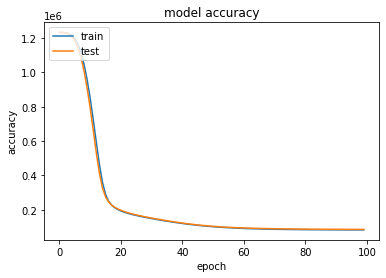

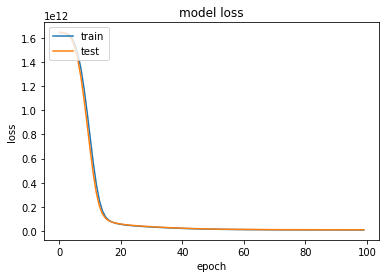

In [119]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
prediction = model.predict(X_test)

In [121]:
prediction[:10]

array([[1075493.6 ],
       [1340044.4 ],
       [1454892.1 ],
       [ 950679.56],
       [ 985299.6 ],
       [1168768.  ],
       [ 923380.44],
       [ 612863.5 ],
       [1300544.1 ],
       [1097824.9 ]], dtype=float32)

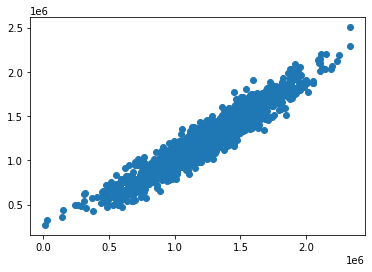

In [122]:
plt.scatter(y_test,prediction)

In [123]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 2))

Mean absolute error = 84995.06
Mean squared error = 11434293398.7
Median absolute error = 72223.22
Explain variance score = 0.91
R2 score = 0.91


In [124]:
model1 = Sequential()
model1.add(Dense(8,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

In [125]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model1.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

28/28 [==============================] - 0s 6ms/step - loss: 1641258156032.0000 - val_loss: 1645965344768.0000
Epoch 2/400
28/28 [==============================] - 0s 2ms/step - loss: 1641257893888.0000 - val_loss: 1645964820480.0000
Epoch 3/400
28/28 [==============================] - 0s 2ms/step - loss: 1641257238528.0000 - val_loss: 1645964558336.0000
Epoch 4/400
28/28 [==============================] - 0s 2ms/step - loss: 1641257238528.0000 - val_loss: 1645964427264.0000
Epoch 5/400
28/2

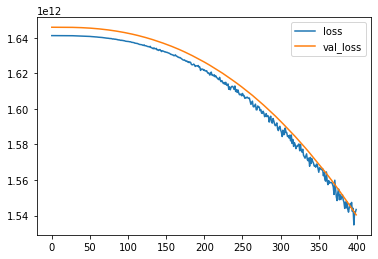

In [126]:
losses = pd.DataFrame(model1.history.history)
losses.plot()